In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import os
import math
import sklearn
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [3]:
path = '/Users/luhan/Desktop/'
df = pd.read_csv(path+'lung_cancer_all_dummified.csv', sep = '\,', engine = 'python')
df.head(10)

,Study ID,Cancer Type Detailed,Sex,Age,Smoking Status,Mutation Count,Fraction Genome Altered,Overall Survival Status,Overall Survival (Months)
0,1,1,0,70,0,0,0.4565,0,0.00
1,1,1,0,81,0,0,0.0000,0,23.98
2,1,1,0,67,0,289,0.2221,0,50.03
3,1,1,1,79,0,0,0.2362,1,3.98
4,1,1,0,68,0,1272,0.0854,0,19.94
5,1,1,0,66,1,119,0.0661,0,13.99
6,1,1,0,70,0,219,0.4579,0,44.97
7,1,1,1,58,1,487,0.3056,0,36.99
8,1,1,0,76,1,214,0.5598,1,0.00
9,1,1,0,76,1,464,0.2340,1,9.95


Text(0, 0.5, 'Age')

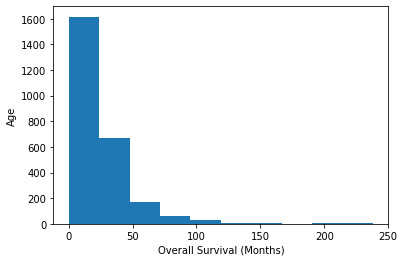

In [5]:
plt.hist(df['Overall Survival (Months)'])
plt.xlabel("Overall Survival (Months)")
plt.ylabel("Age")

<AxesSubplot:xlabel='Overall Survival (Months)', ylabel='Age'>

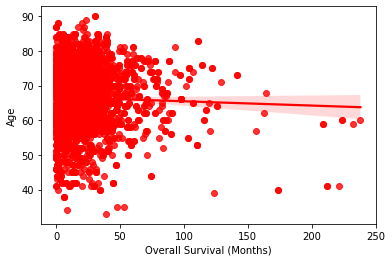

In [7]:
import seaborn as sns
sns.regplot(x="Overall Survival (Months)", y="Age", data=df, color='r')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Overall Survival (Months)'>

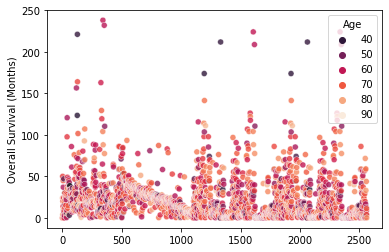

In [10]:
sns.scatterplot(df.index,df['Overall Survival (Months)'],alpha=0.8,hue=df['Age'],palette='rocket')

#Takeways: First, I put Overall Survival (Months) and Age in the histgram to compare, we can see at heatmap, the age between 90-70s have less month of Overall Survival, it fits my guess,beacuse when incresing 1% of age, the Overall Survival (Months)will decrease.

Text(0, 0.5, 'Smoking Status')

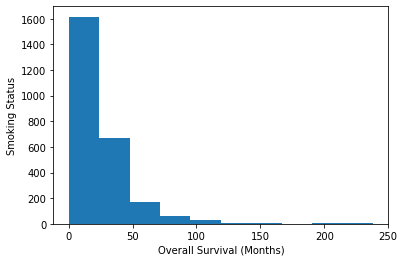

In [8]:
plt.hist(df['Overall Survival (Months)'])
plt.xlabel("Overall Survival (Months)")
plt.ylabel("Smoking Status")

<AxesSubplot:xlabel='Overall Survival (Months)', ylabel='Smoking Status'>

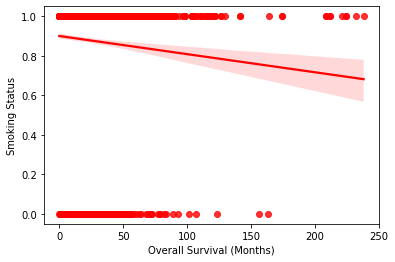

In [9]:
import seaborn as sns
sns.regplot(x="Overall Survival (Months)", y="Smoking Status", data=df, color='r')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Overall Survival (Months)'>

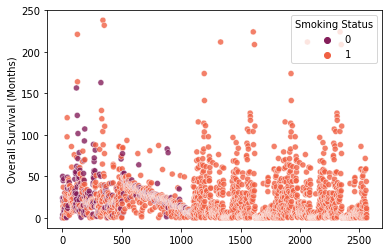

In [54]:
sns.scatterplot(df.index,df['Overall Survival (Months)'],alpha=0.8,hue=df['Smoking Status'],palette='rocket')

#Takeways: Second, I put Overall Survival (Months) and Smoking Status in the histgram to compare, we can see at heatmap, the smoking Status=1, means people who already have cancer have less month of Overall Survival.

Text(0, 0.5, 'Cancer Type Detailed')

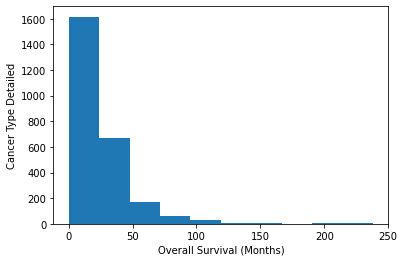

In [12]:
plt.hist(df['Overall Survival (Months)'])
plt.xlabel("Overall Survival (Months)")
plt.ylabel("Cancer Type Detailed")

<AxesSubplot:xlabel='Overall Survival (Months)', ylabel='Cancer Type Detailed'>

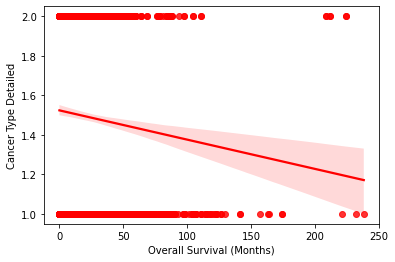

In [13]:
import seaborn as sns
sns.regplot(x="Overall Survival (Months)", y="Cancer Type Detailed", data=df, color='r')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Overall Survival (Months)'>

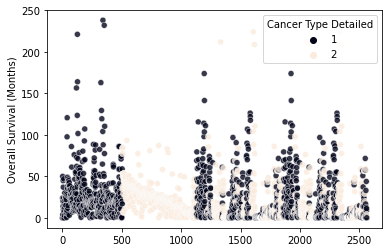

In [14]:
sns.scatterplot(df.index,df['Overall Survival (Months)'],alpha=0.8,hue=df['Cancer Type Detailed'],palette='rocket')

#Takeways: Second, I put Overall Survival (Months) and Cancer Type Detailed in the histgram to compare, we can see at heatmap, the smoking Status=1, means  Small Cell Lung Cancer has lesss month of Overall Survival. It fits my guess.

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Set up function parameters for different cross validation strategies
kfold = KFold(n_splits=5, shuffle=True)
skfold = StratifiedKFold(n_splits=5, shuffle=True) 

In [26]:
y = df['Overall Survival (Months)']
X = pd.DataFrame(df, columns = ['Age',
                                'Sex',
                                'Cancer Type Detailed'])   

In [27]:
# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(2564, 3)


(1923, 3)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn import preprocessing
# Here, I standardize by X data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-0.11613023  1.06131022 -4.06765913]
lr.intercept_: 35.97433750824693


In [36]:
print("Training set score: {:.5f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.5f}".format(lr.score(X_test, y_test)))

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True) 
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1) 

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=kfold, scoring="r2")))

Training set score: 0.00786
Test set score: 0.00772
-0.001870711191455654


In [37]:
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Overall Survival (Months)   R-squared:                       0.008
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     5.068
Date:                       Mon, 11 Apr 2022   Prob (F-statistic):            0.00169
Time:                               23:04:36   Log-Likelihood:                -8963.6
No. Observations:                       1923   AIC:                         1.794e+04
Df Residuals:                           1919   BIC:                         1.796e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.9743      4.508      7.980      0.000      27.133      44.816
Age                     -0.1161      0.062     -1.874      0.061      -0.238       0.005
Sex                      1.0613      1.204      0.882      0.378      -1.300       3.422
Cancer Type Detailed    -4.0677      1.202     -3.383      0.001      -6.426      -1.710
==============================================================================
Omnibus:                     1317.881   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23046.354
Skew:                           3.008   Prob(JB):                         0.00
Kurtosis:                      18.857   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#### Ridge Regressions with Cross-Validations (alpha=1, 10, 0.1 respectively)

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(X_test, y_test)))

Training set score: 0.00786
Test set score: 0.00771


In [49]:
ridgecoef=ridge.coef_

In [50]:
ridge_scores=np.mean(cross_val_score(ridge, X_train,y_train, scoring='r2',cv=kfold))
ridge_scores

-0.0018586317311036326

In [51]:
ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.5f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.00786
Test set score: 0.00772


In [52]:
ridge10_scores=np.mean(cross_val_score(ridge10, X_train,y_train, scoring='r2',cv=kfold))
ridge10_scores

-0.0018694948461888572

In [53]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.5f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.00786
Test set score: 0.00772


In [ ]:
ridge01_scores=np.mean(cross_val_score(ridge01, X_train,y_train, scoring='r2',cv=kfold))
ridge01_scores